# Diabetes Classification Project

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imblearn

import sklearn

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 17.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# Make the graphs a bit prettier and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
# Read in the dataset and view the top 10 rows
df= pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


## Exploratory Data Analysis

In [4]:
# See the shape of the dataset
print("Shape of the dataset: ", df.shape)

# See the column names
print("Columns: ", df.columns)

Shape of the dataset:  (253680, 22)
Columns:  Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [5]:
# See the info for the dataset
print("Info: \n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
# See the summary statistics for the dataset
print("Summary statistics: \n", df.describe())

Summary statistics: 
         Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000  

In [7]:
# Check for missing values
print("Missing values: \n", df.isna().sum())

Missing values: 
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [8]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")


Number of duplicates: 23899


There are a significant amount of duplicate rows in this dataset, I need to drop those.

In [9]:
df.drop_duplicates(inplace = True)
print(df)

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        

### Visualizations

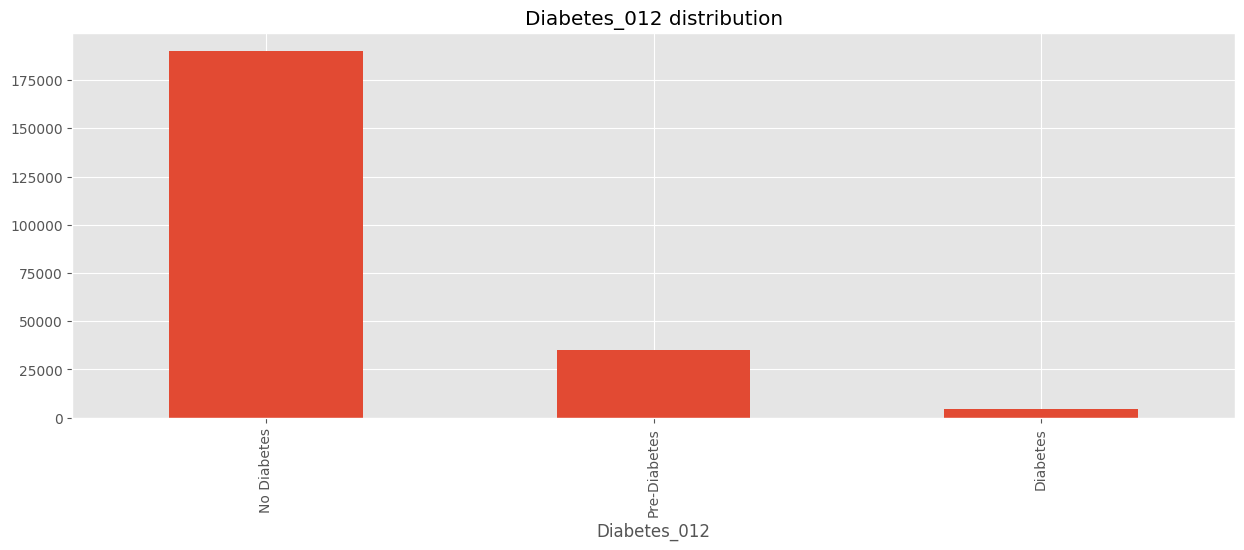

In [10]:
# Plotting the distribution of the target variable
df['Diabetes_012'].value_counts().plot(kind='bar')
plt.title("Diabetes_012 distribution")
plt.xticks(ticks=[0,1,2], labels=['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
plt.show()

This dataset is imbalanced between the three classes, lets see the value counts for precise numbers.

In [11]:
# See the counts for each class of diabetes status
df.groupby("Diabetes_012").size().sort_values()

Diabetes_012
1.0      4629
2.0     35097
0.0    190055
dtype: int64

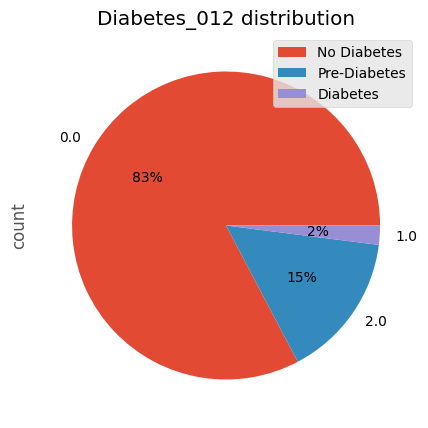

In [12]:
# Plotting the distribution of the target variable in a Pie Chart
df['Diabetes_012'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title("Diabetes_012 distribution")
plt.legend(['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
plt.show()


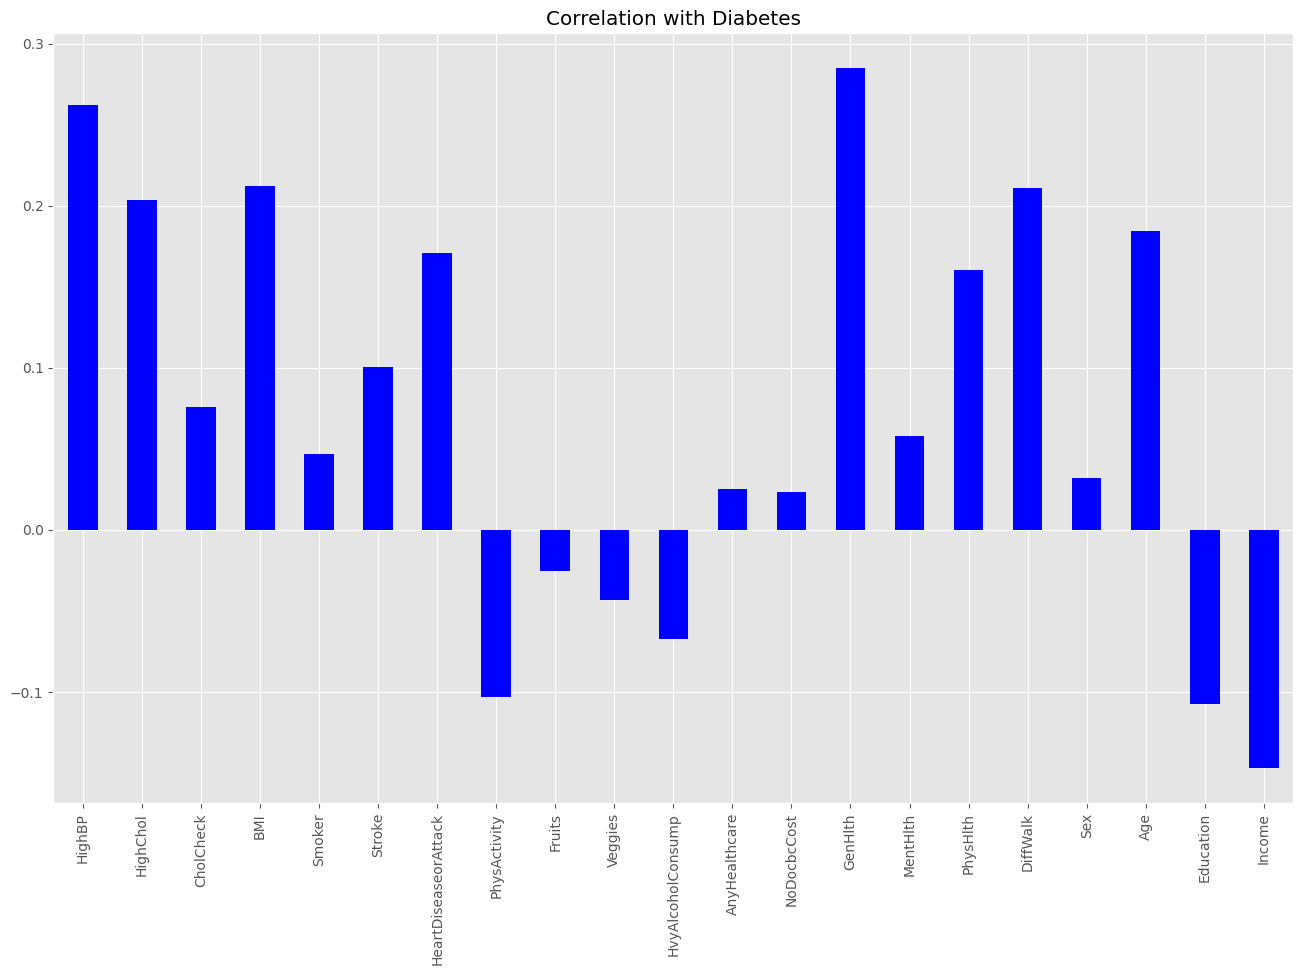

In [13]:
# Plotting the correlations between the features and the target variable
df.drop('Diabetes_012', axis=1).corrwith(df['Diabetes_012']).plot(kind='bar', grid=True, figsize=(16, 10), title="Correlation with Diabetes", color = 'blue')
plt.show()

The variables most positively associated with Diabetes are "High BP", "HighChol", "BMI", and "Age", and "GenHlth". We should see the affect that these variables have on Diabetics vs. Non-Diabetics vs. Pre-Diabetics. We will use a stacked bar chart to show the proportion of people who are either non-diabetic, pre-diabetic, or diabetic for each of these health indicators.

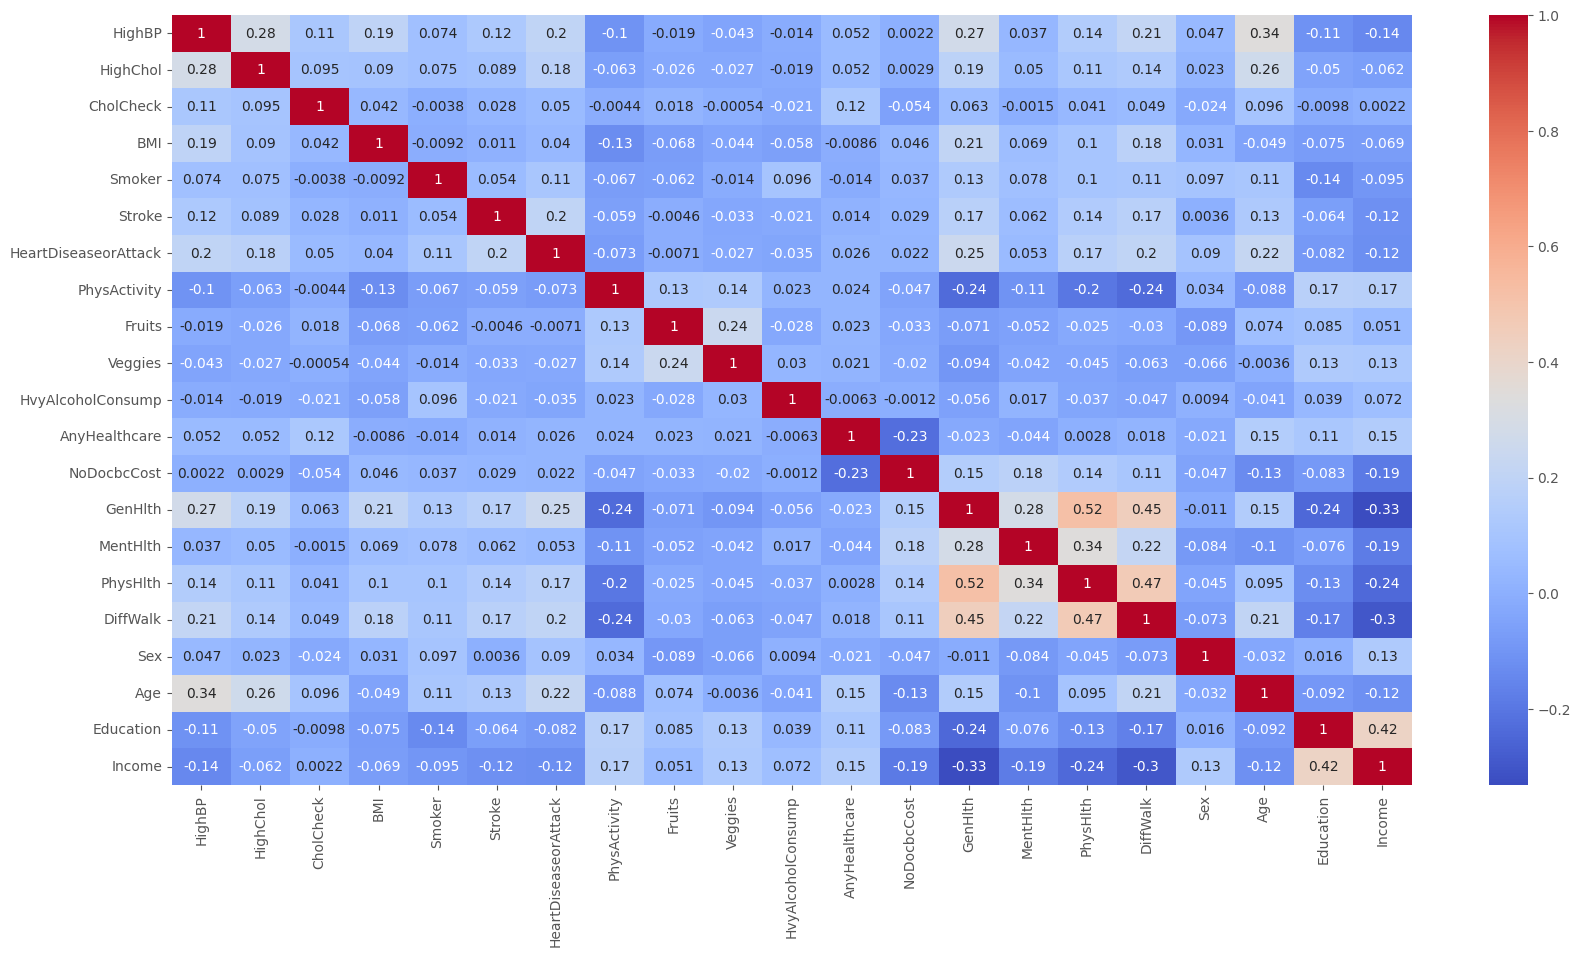

In [14]:
# Construct a heatmap to show the correlation between the features
plt.figure(figsize=(20, 10))
sns.heatmap(df.drop('Diabetes_012', axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
# Converting the binary columns to integers for plotting
df['HighBP'] = df['HighBP'].astype(int)
df['HighChol'] = df['HighChol'].astype(int)
df['BMI'] = df['BMI'].astype(int)
df['GenHlth'] = df['GenHlth'].astype(int)

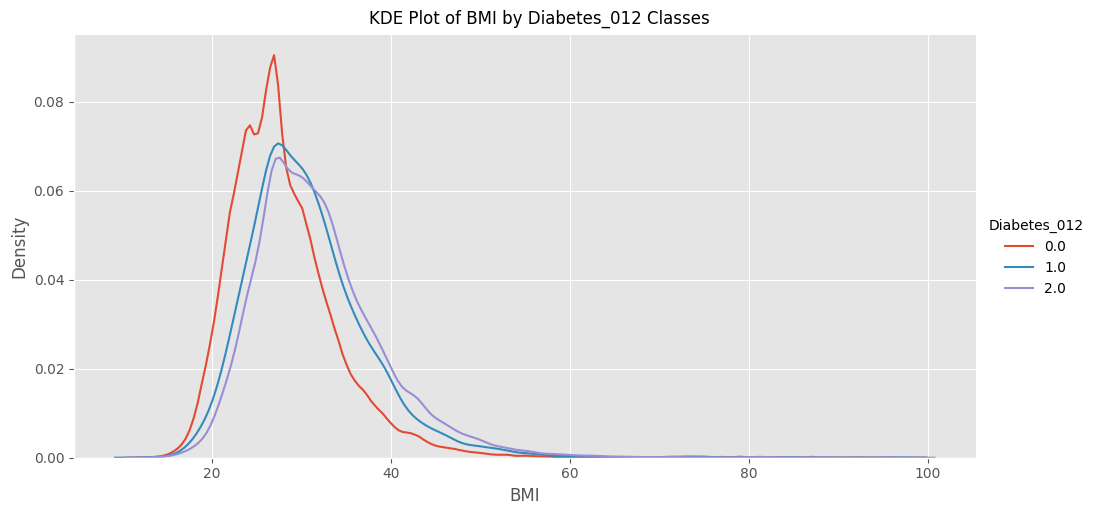

In [16]:
# Kernel Density Plot to show the BMI distribution among the three classes
by_diabetes = sns.FacetGrid(df, hue="Diabetes_012", height=5, aspect=2)
by_diabetes.map(sns.kdeplot, "BMI").add_legend()
by_diabetes.set_axis_labels("BMI", "Density")
by_diabetes.fig.suptitle('KDE Plot of BMI by Diabetes_012 Classes', y=1.02)
plt.show()

As shown in the plot above, both Diabetic and Pre-Diabetic patients tend to have a higher BMI than Non-Diabetics. 

## Pre-Processing

### Feature Scaling

In [17]:
# Scale the variables that have larger ranges than 0-1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['BMI', 'GenHlth', 'Age', 'MentHlth', 'PhysHlth', 'Income']] = scaler.fit_transform(df[['BMI', 'GenHlth', 'Age', 'MentHlth', 'PhysHlth', 'Income']])

# Sanity check
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1,1,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,4.0,0.285714
1,0.0,0,0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,6.0,0.000000
2,0.0,1,1,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,4.0,1.000000
3,0.0,1,0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,3.0,0.714286
4,0.0,1,1,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,5.0,0.428571
5,0.0,1,1,1.0,0.151163,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.066667,0.0,1.0,0.750000,6.0,1.000000
6,0.0,1,0,1.0,0.209302,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.50,0.0,0.466667,0.0,0.0,0.666667,6.0,0.857143
7,0.0,1,1,1.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.0,0.000000,1.0,0.0,0.833333,4.0,0.428571
8,2.0,1,1,1.0,0.209302,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.00,1.0,1.000000,1.0,0.0,0.666667,5.0,0.000000
9,0.0,0,0,1.0,0.139535,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,1.0,0.583333,4.0,0.285714


### Balancing & Training the dataset

In [18]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
# Balancing the dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## Modeling and Evaluating

In [20]:
# Select and import the Classifier Models and Metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, roc_curve

### Decision Tree Classifier

In [21]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=6, random_state=0)
dtc.fit(X_train_balanced, y_train_balanced)
y_pred = dtc.predict(X_test)

In [22]:
# Metrics for the Decision Tree Classifier
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))

Accuracy:  0.7319233196248667
Confusion Matrix: 
 [[29327     0  8509]
 [  522     0   386]
 [ 2903     0  4310]]
F1 Score:  0.4177036491232857
Recall:  0.4575468652911749


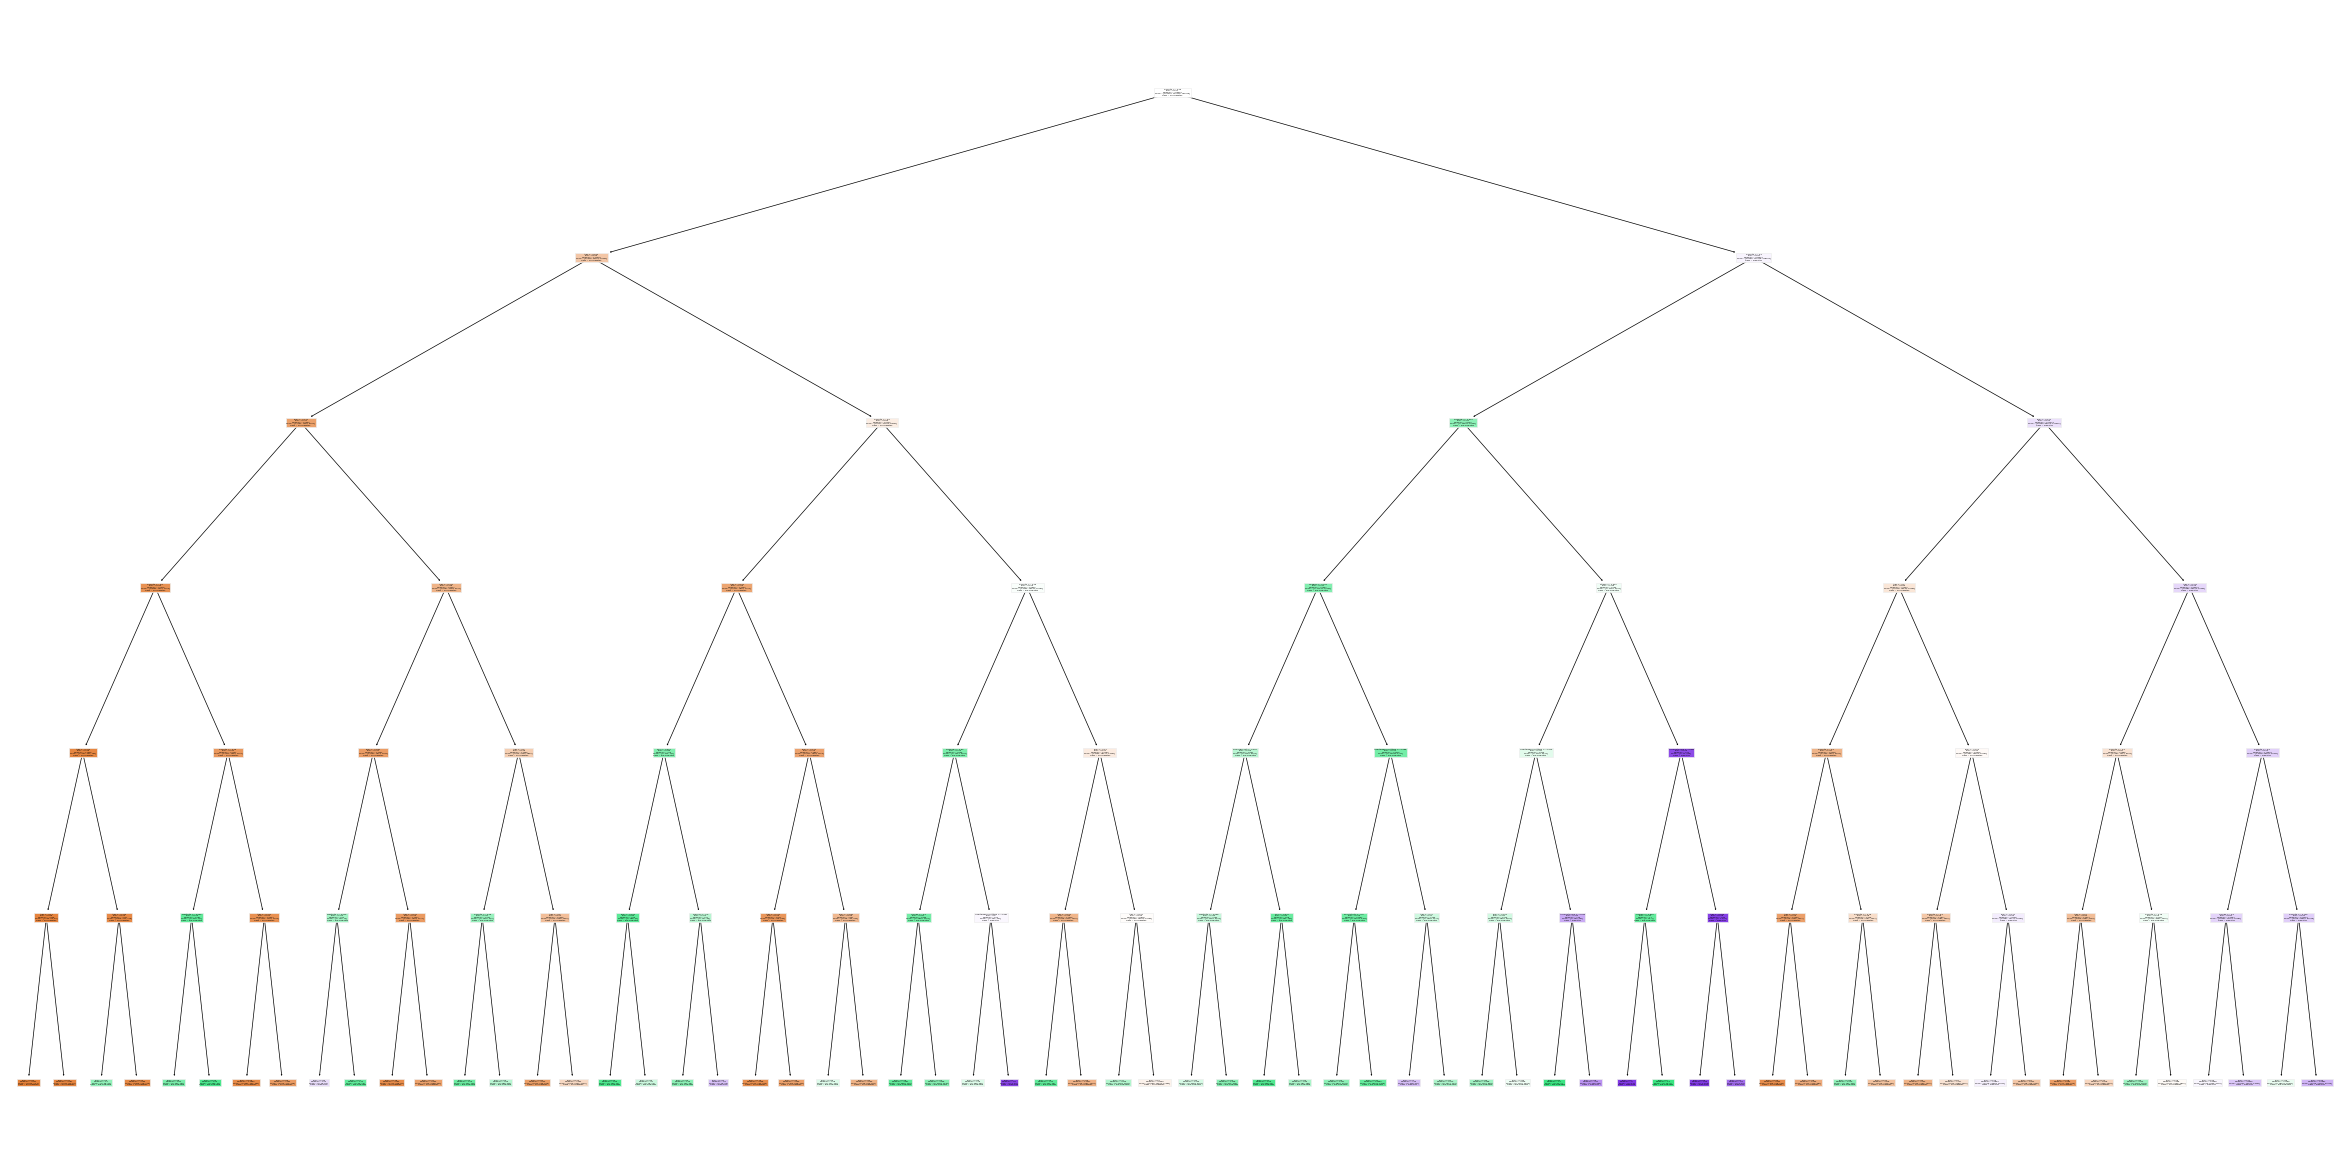

In [26]:
# Visualize the Decision Tree Classifier
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 15))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
plt.show()

### Random Forest Classifier

In [24]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train_balanced, y_train_balanced)
y_pred = rfc.predict(X_test)

In [25]:
# Metrics for Random Forest Classifier
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))

Accuracy:  0.8054920904323607
Confusion Matrix: 
 [[34432   130  3274]
 [  707     7   194]
 [ 4594    40  2579]]
F1 Score:  0.42989000048858345
Recall:  0.42509696473912867


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a33352d-fbe3-4292-b41a-6d7165c2809b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>